# Example NB

In [1]:
import pandas as pd
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

Importing plotly failed. Interactive plots will not work.


## Data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/facebook/prophet/main/examples/example_wp_log_peyton_manning.csv')
display(df)

,ds,y
0,2007-12-10,9.590761
1,2007-12-11,8.519590
2,2007-12-12,8.183677
3,2007-12-13,8.072467
4,2007-12-14,7.893572
...,...,...
2900,2016-01-16,7.817223
2901,2016-01-17,9.273878
2902,2016-01-18,10.333775
2903,2016-01-19,9.125871


## Model

### Basic Stuff

In [3]:
m = Prophet()
m.fit(df)


future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
# forecast cas same dates as future
display(forecast)

17:54:29 - cmdstanpy - INFO - Chain [1] start processing
17:54:29 - cmdstanpy - INFO - Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2007-12-10,8.041704,8.253175,9.484788,8.041704,8.041704,0.802946,0.802946,0.802946,0.352288,0.352288,0.352288,0.450658,0.450658,0.450658,0.0,0.0,0.0,8.844650
1,2007-12-11,8.040157,7.987384,9.205148,8.040157,8.040157,0.553024,0.553024,0.553024,0.119636,0.119636,0.119636,0.433389,0.433389,0.433389,0.0,0.0,0.0,8.593182
2,2007-12-12,8.038611,7.774997,9.013005,8.038611,8.038611,0.350386,0.350386,0.350386,-0.066669,-0.066669,-0.066669,0.417055,0.417055,0.417055,0.0,0.0,0.0,8.388997
3,2007-12-13,8.037064,7.780179,8.971082,8.037064,8.037064,0.329846,0.329846,0.329846,-0.072254,-0.072254,-0.072254,0.402100,0.402100,0.402100,0.0,0.0,0.0,8.366910
4,2007-12-14,8.035517,7.744629,8.984761,8.035517,8.035517,0.319356,0.319356,0.319356,-0.069575,-0.069575,-0.069575,0.388931,0.388931,0.388931,0.0,0.0,0.0,8.354874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3265,2017-01-15,7.192173,7.473760,8.938041,6.831213,7.524798,1.017923,1.017923,1.017923,0.048287,0.048287,0.048287,0.969637,0.969637,0.969637,0.0,0.0,0.0,8.210097
3266,2017-01-16,7.191152,7.780094,9.295830,6.829012,7.524799,1.343970,1.343970,1.343970,0.352288,0.352288,0.352288,0.991681,0.991681,0.991681,0.0,0.0,0.0,8.535122
3267,2017-01-17,7.190131,7.575760,9.054421,6.826811,7.524801,1.132419,1.132419,1.132419,0.119636,0.119636,0.119636,1.012783,1.012783,1.012783,0.0,0.0,0.0,8.322549
3268,2017-01-18,7.189109,7.423203,8.813132,6.824610,7.524802,0.966069,0.966069,0.966069,-0.066669,-0.066669,-0.066669,1.032738,1.032738,1.032738,0.0,0.0,0.0,8.155179


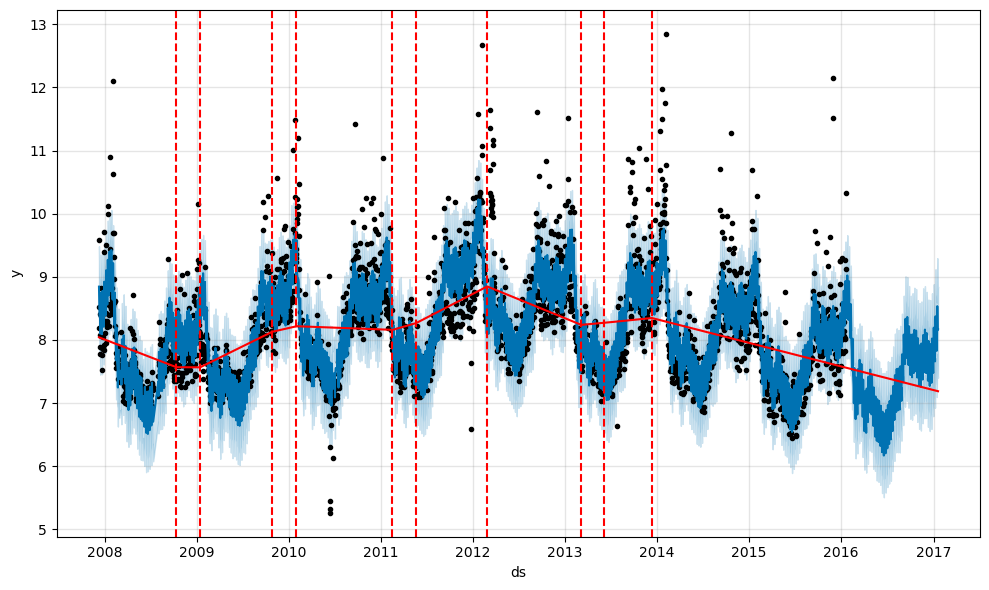

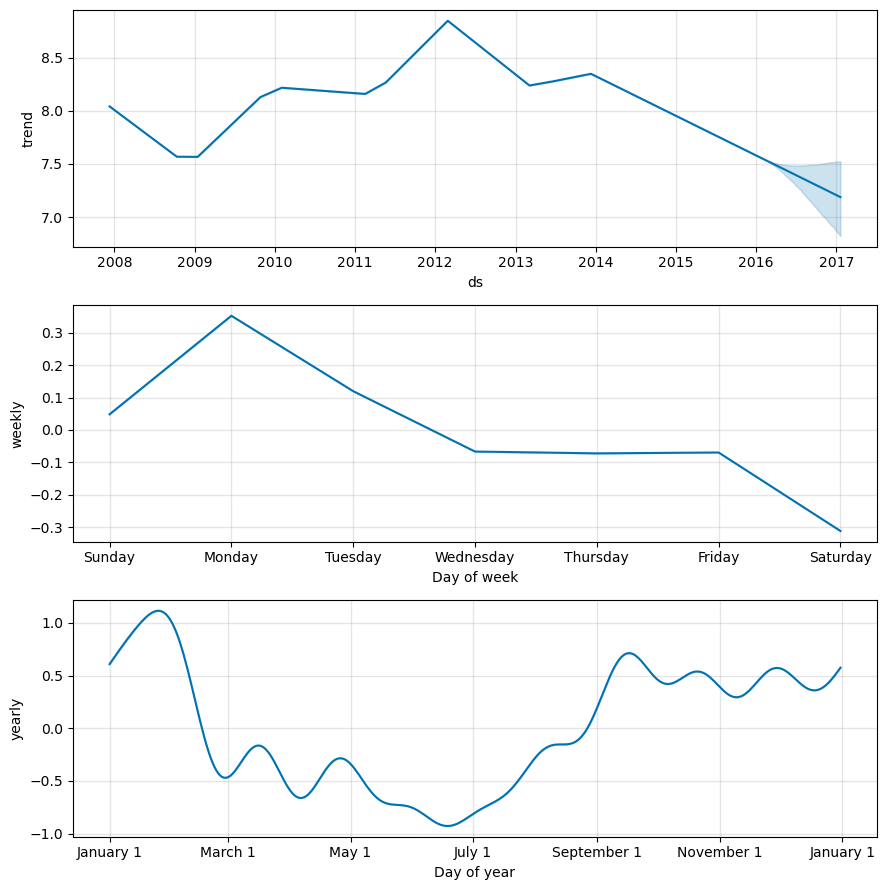

In [4]:
fig1 = m.plot(forecast)
a = add_changepoints_to_plot(fig1.gca(), m, forecast)
fig2 = m.plot_components(forecast)

### Diagnostics

In [5]:
transformed = m.preprocess(df)
transformed.cap

array([0., 0., 0., ..., 0., 0., 0.])

In [6]:
m.calculate_initial_params(num_total_regressors=transformed.K)

ModelParams(k=-0.05444079622224118, m=0.7465517318876905, delta=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.]), beta=array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0.]), sigma_obs=1.0)

## Logisitic

In [9]:
df_logitic = df.copy()
# capacity has to be supplied in the input df
df_logitic['cap'] = 0.8
m_logisitc = Prophet(growth='logistic')
m_logisitc.fit(df_logitic)


17:54:56 - cmdstanpy - INFO - Chain [1] start processing
17:54:57 - cmdstanpy - INFO - Chain [1] done processing


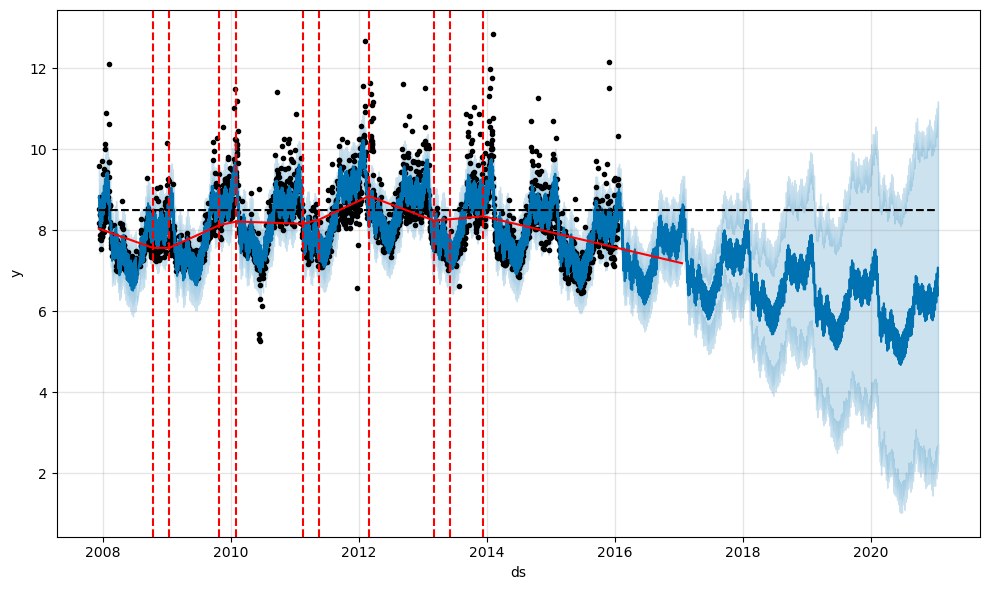

In [11]:
future = m.make_future_dataframe(periods=1826)
future['cap'] = 8.5
fcst = m.predict(future)
fig = m.plot(fcst)
logistic_a = add_changepoints_to_plot(fig.gca(), m, forecast)
